In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
df = pd.read_excel('Data_Train.xlsx')

In [263]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [264]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [266]:
df.isna()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [267]:
df.isna().count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10683
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10683
Additional_Info    10683
Price              10683
dtype: int64

In [268]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [269]:
df[df['Route'].isna()|df['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [270]:
df.dropna(inplace=True)
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [271]:
def convert_duration(Duration):
    if len(Duration.split())==2:
        hours=int(Duration.split()[0][ : -1])
        minutes=int(Duration.split()[1][ : -1])
        return hours*60+minutes
    else:
        return int(Duration[ : -1])*60
     

In [272]:
df['Duration']=df['Duration'].apply(convert_duration)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [273]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [274]:

df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration            int64
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [275]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [276]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df.dtypes

C:\Users\Sravan\AppData\Local\Temp\ipykernel_7480\1526666184.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])


Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                    int64
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [277]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [278]:
df['Date_of_Journey'].dt.year.unique()

array([2019])

In [279]:
df['Day']=df['Date_of_Journey'].dt.day

In [280]:
df['Month']=df['Date_of_Journey'].dt.month

In [281]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,1,3


In [282]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [283]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,1,3


In [284]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [285]:
df['Total_Stops']=df['Total_Stops'].map({'1 stop':1 , 'non-stop':0 , '2 stops':2 , '3 stops':3 , '4 stops':4})

In [286]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,13302,1,3


In [287]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [288]:
df.drop(['Additional_Info'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,13302,1,3


In [289]:
df.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time',
       'Arrival_Time'],
      dtype='object')

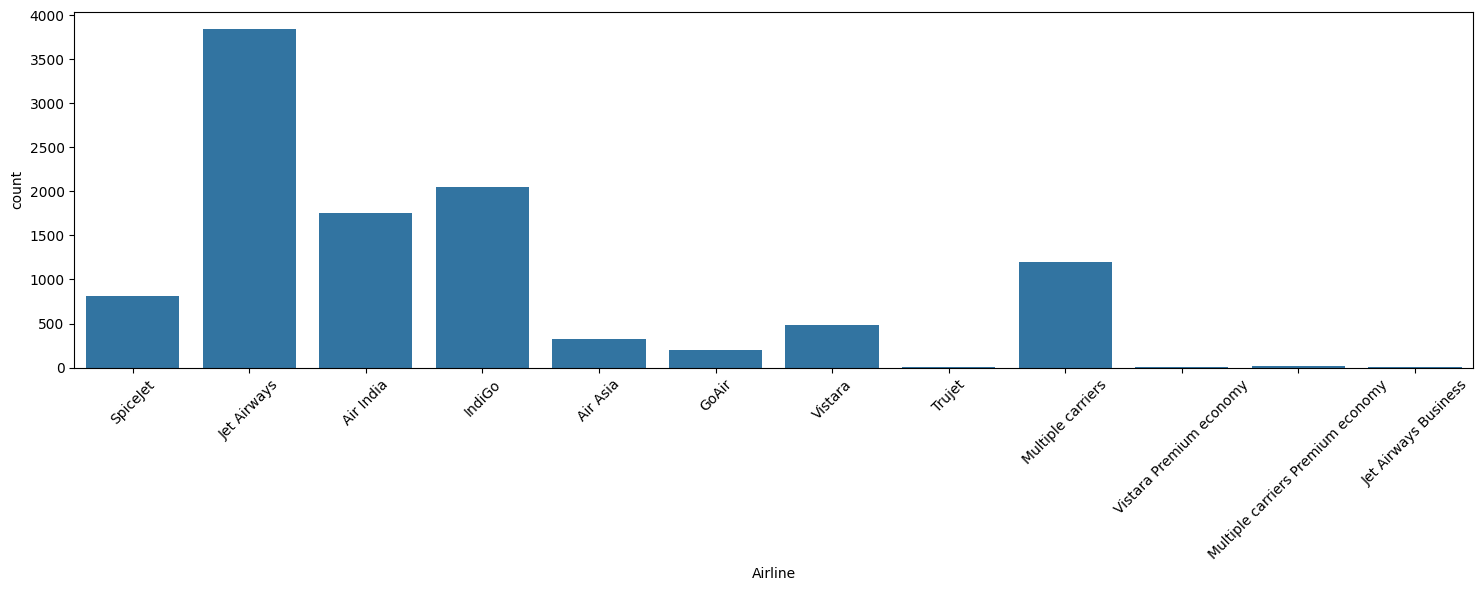

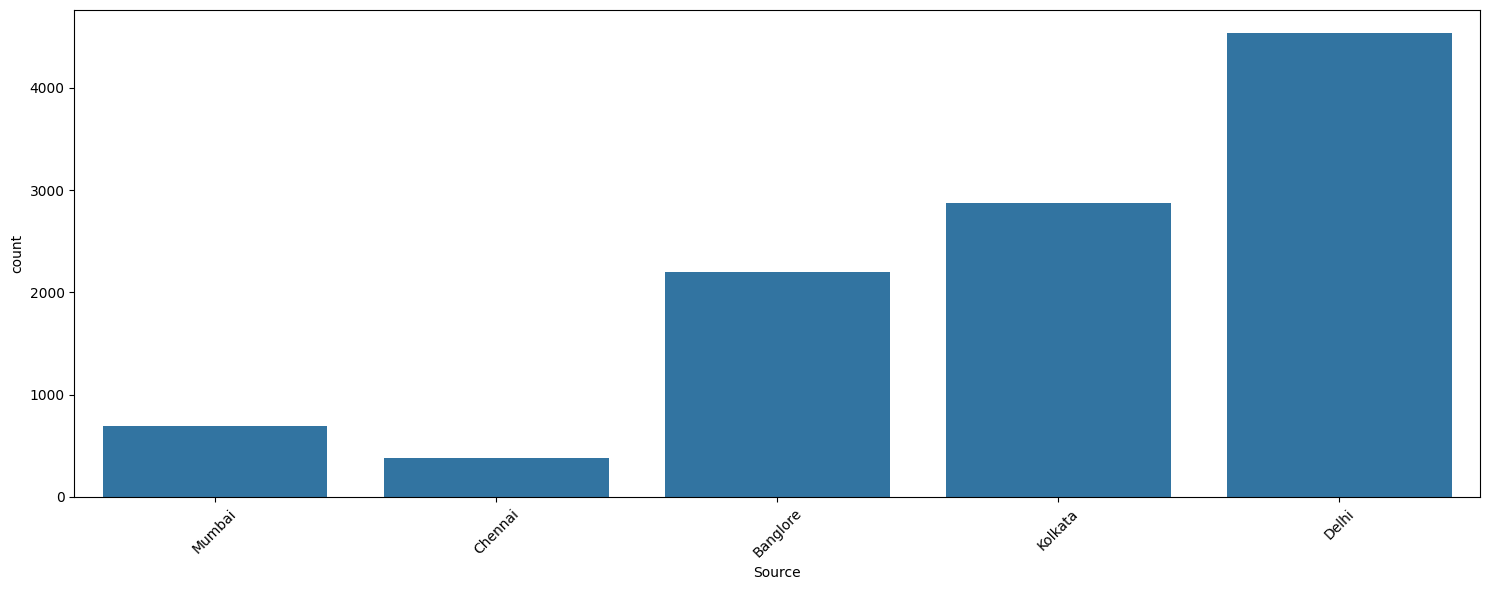

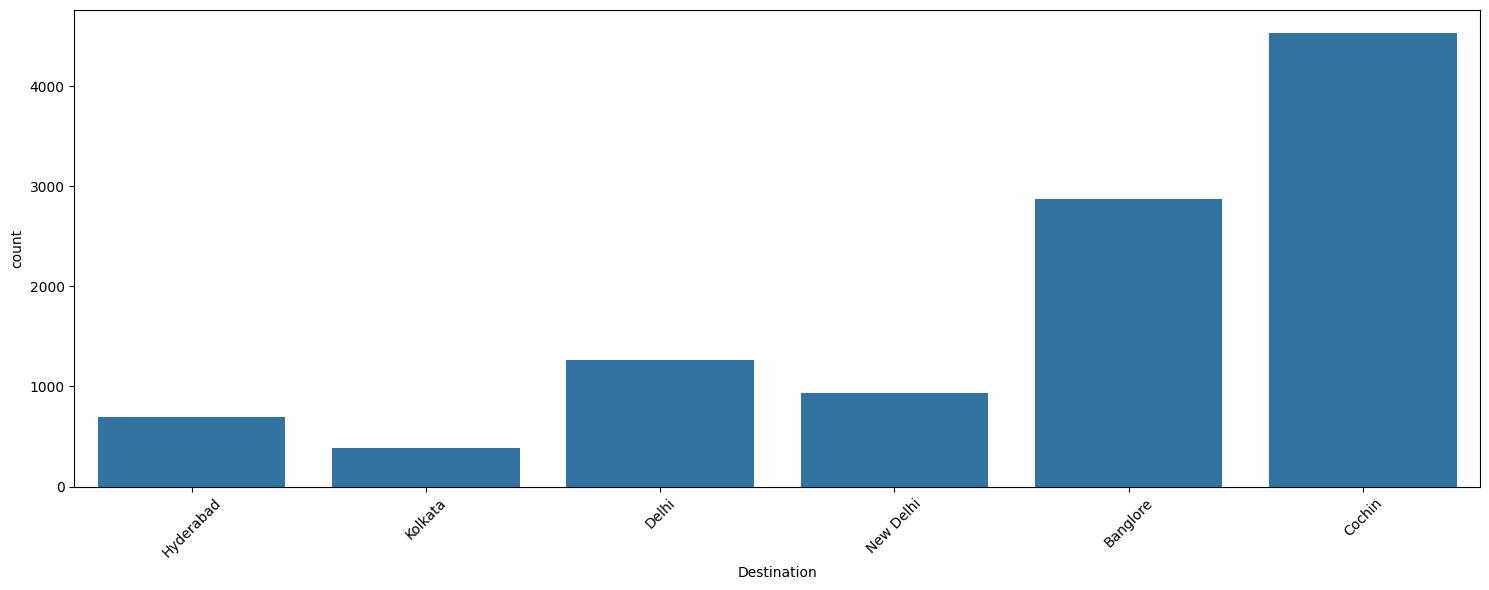

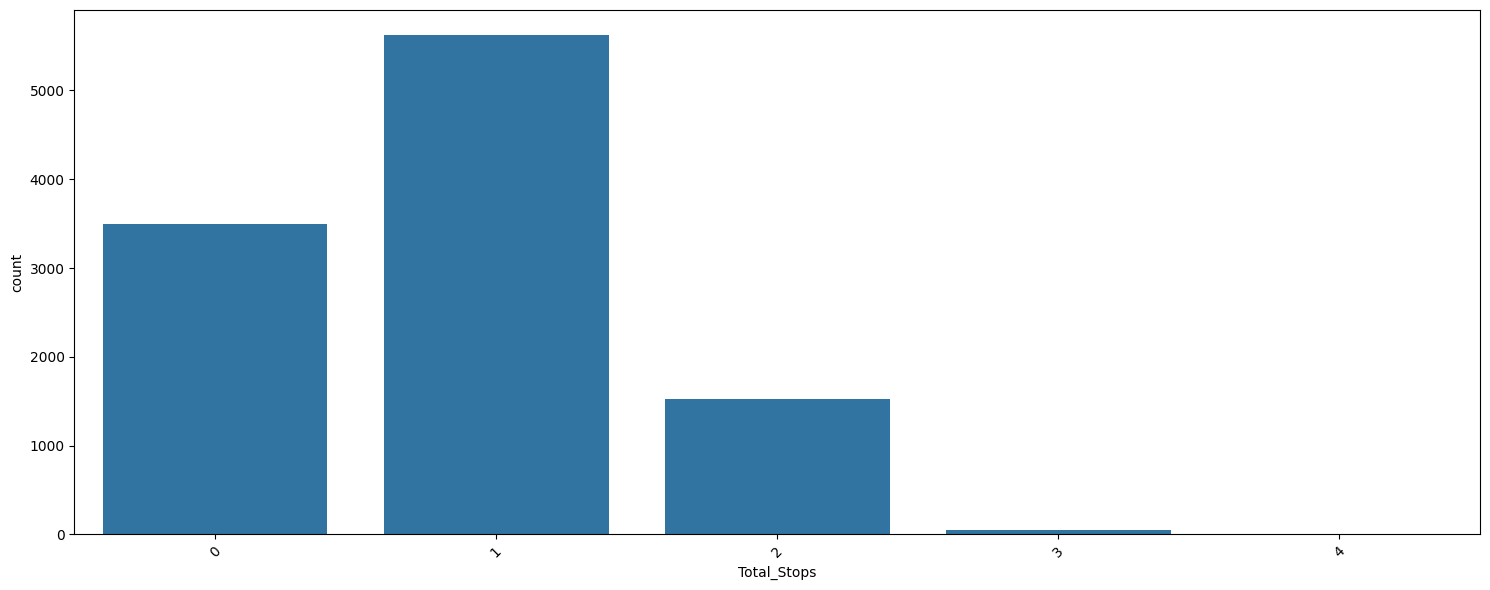

In [290]:
for i in ['Airline', 'Source', 'Destination', 'Total_Stops']:
    plt.figure(figsize=(15, 6))
    sns.countplot(x=i, data=df.sort_values('Price', ascending=True))
    plt.xticks(rotation=45)
    plt.tight_layout()  
    plt.show()
    print('\n\n')

In [291]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

C:\Users\Sravan\AppData\Local\Temp\ipykernel_7480\3253560837.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


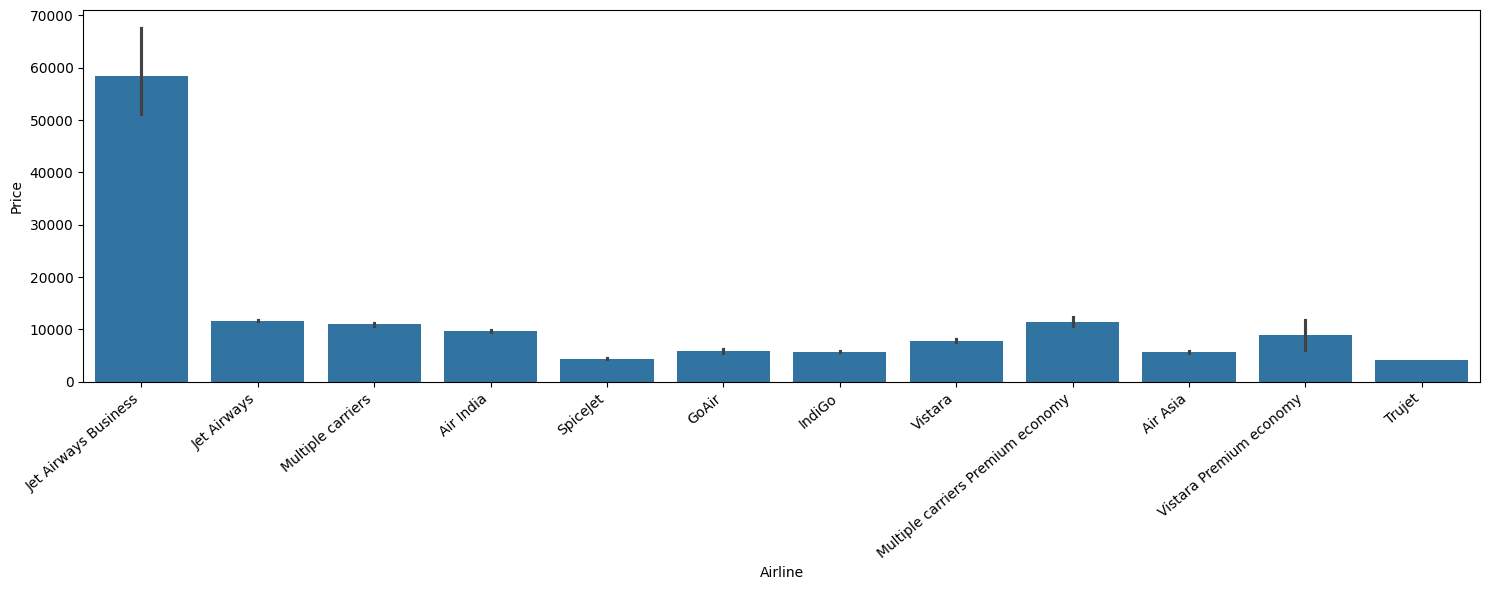

In [292]:
plt.figure(figsize = (15,6))
ax=sns.barplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.tight_layout()
plt.show()

In [293]:
df.groupby('Airline').describe()['Price'].sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Jet Airways Business,6.0,58358.666667,11667.596748,46490.0,52243.0,54747.0,61122.50,79512.0
Jet Airways,3849.0,11643.923357,4258.940578,1840.0,9134.0,11467.0,14151.00,54826.0
Multiple carriers Premium economy,13.0,11418.846154,1717.153936,9845.0,10161.0,11269.0,11269.00,14629.0
Multiple carriers,1196.0,10902.678094,3721.234997,5797.0,7723.0,10197.0,13587.00,36983.0
Air India,1751.0,9612.427756,3901.734561,2050.0,6891.0,9443.0,12219.00,31945.0
Vistara Premium economy,3.0,8962.333333,2915.405518,5969.0,7547.0,9125.0,10459.00,11793.0
Vistara,479.0,7796.348643,2914.298578,3687.0,5403.0,7980.0,9345.00,21730.0
GoAir,194.0,5861.056701,2703.585767,3398.0,3898.0,5135.0,6811.25,22794.0
IndiGo,2053.0,5673.682903,2264.142168,2227.0,4226.0,5000.0,6494.00,22153.0


In [294]:
Airline = pd.get_dummies(df['Airline'], drop_first=True, columns=['Airline'])
Airline = Airline.astype(int)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [295]:
df=pd.concat([df,Airline],axis=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,3897,24,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,7662,1,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,13882,9,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,6218,12,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,13302,1,...,0,1,0,0,0,0,0,0,0,0


In [296]:
df.drop('Airline',axis=1,inplace=True)

In [297]:
df.head()

,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,3897,24,3,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,7662,1,5,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,13882,9,6,...,0,0,1,0,0,0,0,0,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,6218,12,5,...,0,1,0,0,0,0,0,0,0,0
4,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,13302,1,3,...,0,1,0,0,0,0,0,0,0,0


In [298]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])
df.dtypes

C:\Users\Sravan\AppData\Local\Temp\ipykernel_7480\806276774.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
C:\Users\Sravan\AppData\Local\Temp\ipykernel_7480\806276774.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])


Source                                       object
Destination                                  object
Route                                        object
Dep_Time                             datetime64[ns]
Arrival_Time                         datetime64[ns]
Duration                                      int64
Total_Stops                                   int64
Price                                         int64
Day                                           int32
Month                                         int32
Air India                                     int32
GoAir                                         int32
IndiGo                                        int32
Jet Airways                                   int32
Jet Airways Business                          int32
Multiple carriers                             int32
Multiple carriers Premium economy             int32
SpiceJet                                      int32
Trujet                                        int32
Vistara     

In [299]:
df['Dep_in_hour']= df['Dep_Time'].dt.hour
df['Dep_in_minute']= df['Dep_Time'].dt.minute
df['Arrival_in_hour']= df['Arrival_Time'].dt.hour
df['Arrival_in_minute']= df['Arrival_Time'].dt.minute
df.head()

,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,...,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Dep_in_hour,Dep_in_minute,Arrival_in_hour,Arrival_in_minute
0,Banglore,New Delhi,BLR → DEL,2024-04-14 22:20:00,2024-03-22 01:10:00,170,0,3897,24,3,...,0,0,0,0,0,0,22,20,1,10
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-04-14 05:50:00,2024-04-14 13:15:00,445,2,7662,1,5,...,0,0,0,0,0,0,5,50,13,15
2,Delhi,Cochin,DEL → LKO → BOM → COK,2024-04-14 09:25:00,2024-06-10 04:25:00,1140,2,13882,9,6,...,0,0,0,0,0,0,9,25,4,25
3,Kolkata,Banglore,CCU → NAG → BLR,2024-04-14 18:05:00,2024-04-14 23:30:00,325,1,6218,12,5,...,0,0,0,0,0,0,18,5,23,30
4,Banglore,New Delhi,BLR → NAG → DEL,2024-04-14 16:50:00,2024-04-14 21:35:00,285,1,13302,1,3,...,0,0,0,0,0,0,16,50,21,35


In [300]:
df.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [301]:
df.head()

,Source,Destination,Route,Duration,Total_Stops,Price,Day,Month,Air India,GoAir,...,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Dep_in_hour,Dep_in_minute,Arrival_in_hour,Arrival_in_minute
0,Banglore,New Delhi,BLR → DEL,170,0,3897,24,3,0,0,...,0,0,0,0,0,0,22,20,1,10
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,1,5,1,0,...,0,0,0,0,0,0,5,50,13,15
2,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,6,0,0,...,0,0,0,0,0,0,9,25,4,25
3,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,12,5,0,0,...,0,0,0,0,0,0,18,5,23,30
4,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,1,3,0,0,...,0,0,0,0,0,0,16,50,21,35


In [302]:
list1=['Source','Destination']
for l in list1:
    print(df[[l]].value_counts(),'\n')

Source  
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64 

Destination
Cochin         4536
Banglore       2871
Delhi          1265
New Delhi       932
Hyderabad       697
Kolkata         381
Name: count, dtype: int64 



In [303]:
destination=pd.get_dummies(df['Destination'], columns=list1,drop_first=True)
destination=destination.astype(int)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [304]:
df=pd.concat([df,destination],axis=True)
df.head()

,Source,Destination,Route,Duration,Total_Stops,Price,Day,Month,Air India,GoAir,...,Vistara Premium economy,Dep_in_hour,Dep_in_minute,Arrival_in_hour,Arrival_in_minute,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,Banglore,New Delhi,BLR → DEL,170,0,3897,24,3,0,0,...,0,22,20,1,10,0,0,0,0,1
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,1,5,1,0,...,0,5,50,13,15,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,6,0,0,...,0,9,25,4,25,1,0,0,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,12,5,0,0,...,0,18,5,23,30,0,0,0,0,0
4,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,1,3,0,0,...,0,16,50,21,35,0,0,0,0,1


In [305]:
source=pd.get_dummies(df['Source'],columns=list1,drop_first=True)
source=source.astype(int)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [306]:
df=pd.concat([df,source],axis=True)
df.head()

,Source,Destination,Route,Duration,Total_Stops,Price,Day,Month,Air India,GoAir,...,Arrival_in_minute,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai
0,Banglore,New Delhi,BLR → DEL,170,0,3897,24,3,0,0,...,10,0,0,0,0,1,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,1,5,1,0,...,15,0,0,0,0,0,0,0,1,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,6,0,0,...,25,1,0,0,0,0,0,1,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,12,5,0,0,...,30,0,0,0,0,0,0,0,1,0
4,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,1,3,0,0,...,35,0,0,0,0,1,0,0,0,0


In [307]:
df['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

In [308]:
df['Route_1'] = df['Route'].str.split('→').str[0]
df['Route_2'] = df['Route'].str.split('→').str[1]
df['Route_3'] = df['Route'].str.split('→').str[2]
df['Route_4'] = df['Route'].str.split('→').str[3]
df['Route_5'] = df['Route'].str.split('→').str[4]
df.head()


,Source,Destination,Route,Duration,Total_Stops,Price,Day,Month,Air India,GoAir,...,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Route_1,Route_2,Route_3,Route_4,Route_5
0,Banglore,New Delhi,BLR → DEL,170,0,3897,24,3,0,0,...,1,0,0,0,0,BLR,DEL,NaN,NaN,NaN
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,1,5,1,0,...,0,0,0,1,0,CCU,IXR,BBI,BLR,NaN
2,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,6,0,0,...,0,0,1,0,0,DEL,LKO,BOM,COK,NaN
3,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,12,5,0,0,...,0,0,0,1,0,CCU,NAG,BLR,NaN,NaN
4,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,1,3,0,0,...,1,0,0,0,0,BLR,NAG,DEL,NaN,NaN


In [309]:
df.drop('Route',axis=1,inplace=True)

In [310]:
df.head()

,Source,Destination,Duration,Total_Stops,Price,Day,Month,Air India,GoAir,IndiGo,...,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Route_1,Route_2,Route_3,Route_4,Route_5
0,Banglore,New Delhi,170,0,3897,24,3,0,0,1,...,1,0,0,0,0,BLR,DEL,NaN,NaN,NaN
1,Kolkata,Banglore,445,2,7662,1,5,1,0,0,...,0,0,0,1,0,CCU,IXR,BBI,BLR,NaN
2,Delhi,Cochin,1140,2,13882,9,6,0,0,0,...,0,0,1,0,0,DEL,LKO,BOM,COK,NaN
3,Kolkata,Banglore,325,1,6218,12,5,0,0,1,...,0,0,0,1,0,CCU,NAG,BLR,NaN,NaN
4,Banglore,New Delhi,285,1,13302,1,3,0,0,1,...,1,0,0,0,0,BLR,NAG,DEL,NaN,NaN


In [311]:
df.isna().sum()

Source                                   0
Destination                              0
Duration                                 0
Total_Stops                              0
Price                                    0
Day                                      0
Month                                    0
Air India                                0
GoAir                                    0
IndiGo                                   0
Jet Airways                              0
Jet Airways Business                     0
Multiple carriers                        0
Multiple carriers Premium economy        0
SpiceJet                                 0
Trujet                                   0
Vistara                                  0
Vistara Premium economy                  0
Dep_in_hour                              0
Dep_in_minute                            0
Arrival_in_hour                          0
Arrival_in_minute                        0
Cochin                                   0
Delhi      

In [312]:
for i in ['Route_3', 'Route_4', 'Route_5']:
    df[i].fillna('None',inplace=True)

C:\Users\Sravan\AppData\Local\Temp\ipykernel_7480\390100743.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna('None',inplace=True)


In [313]:
df.isnull().sum()

Source                               0
Destination                          0
Duration                             0
Total_Stops                          0
Price                                0
Day                                  0
Month                                0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Dep_in_hour                          0
Dep_in_minute                        0
Arrival_in_hour                      0
Arrival_in_minute                    0
Cochin                               0
Delhi                                0
Hyderabad                            0
Kolkata                  

In [314]:
from sklearn.preprocessing import LabelEncoder

In [315]:
for i in['Route_1','Route_2','Route_3','Route_4','Route_5']:
    encoder =LabelEncoder()
    df[i]=encoder.fit_transform(df[i])
df.head()

,Source,Destination,Duration,Total_Stops,Price,Day,Month,Air India,GoAir,IndiGo,...,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Route_1,Route_2,Route_3,Route_4,Route_5
0,Banglore,New Delhi,170,0,3897,24,3,0,0,1,...,1,0,0,0,0,0,13,29,13,5
1,Kolkata,Banglore,445,2,7662,1,5,1,0,0,...,0,0,0,1,0,2,25,1,3,5
2,Delhi,Cochin,1140,2,13882,9,6,0,0,0,...,0,0,1,0,0,3,32,4,5,5
3,Kolkata,Banglore,325,1,6218,12,5,0,0,1,...,0,0,0,1,0,2,34,3,13,5
4,Banglore,New Delhi,285,1,13302,1,3,0,0,1,...,1,0,0,0,0,0,34,8,13,5


In [316]:
df.drop(['Source','Destination'],axis=1,inplace = True)


In [317]:
df.head()

,Duration,Total_Stops,Price,Day,Month,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,...,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Route_1,Route_2,Route_3,Route_4,Route_5
0,170,0,3897,24,3,0,0,1,0,0,...,1,0,0,0,0,0,13,29,13,5
1,445,2,7662,1,5,1,0,0,0,0,...,0,0,0,1,0,2,25,1,3,5
2,1140,2,13882,9,6,0,0,0,1,0,...,0,0,1,0,0,3,32,4,5,5
3,325,1,6218,12,5,0,0,1,0,0,...,0,0,0,1,0,2,34,3,13,5
4,285,1,13302,1,3,0,0,1,0,0,...,1,0,0,0,0,0,34,8,13,5


In [318]:
temp_col=df.columns.to_list()
print(temp_col,'\n')
new_col=temp_col[:2]+temp_col[3:]
new_col.append(temp_col[2])
print(new_col,'\n')

['Duration', 'Total_Stops', 'Price', 'Day', 'Month', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy', 'Dep_in_hour', 'Dep_in_minute', 'Arrival_in_hour', 'Arrival_in_minute', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'] 

['Duration', 'Total_Stops', 'Day', 'Month', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy', 'Dep_in_hour', 'Dep_in_minute', 'Arrival_in_hour', 'Arrival_in_minute', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Price'] 



In [319]:
# Extract 'Price' column
price_column = df['Price']
df = df.drop(columns=['Price'])
df = pd.concat([df, price_column], axis=1)
df.head()


,Duration,Total_Stops,Day,Month,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,...,Chennai,Delhi,Kolkata,Mumbai,Route_1,Route_2,Route_3,Route_4,Route_5,Price
0,170,0,24,3,0,0,1,0,0,0,...,0,0,0,0,0,13,29,13,5,3897
1,445,2,1,5,1,0,0,0,0,0,...,0,0,1,0,2,25,1,3,5,7662
2,1140,2,9,6,0,0,0,1,0,0,...,0,1,0,0,3,32,4,5,5,13882
3,325,1,12,5,0,0,1,0,0,0,...,0,0,1,0,2,34,3,13,5,6218
4,285,1,1,3,0,0,1,0,0,0,...,0,0,0,0,0,34,8,13,5,13302


In [320]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df=scaler.fit_transform(df)
df[0]

array([-0.93160111, -1.22066609,  1.23728754, -1.46740227, -0.44278513,
       -0.13600489,  2.05015058, -0.75053033, -0.02370671, -0.35507822,
       -0.03490678, -0.28797191, -0.00967596, -0.21667251, -0.01676082,
        1.65415376, -0.2349499 , -1.80043628, -0.8900139 , -0.85909313,
       -0.36651266, -0.2642058 , -0.19231927,  3.23440464, -0.19231927,
       -0.85909313, -0.60626609, -0.2642058 , -1.67418972,  0.13765097,
        1.39512392,  0.40974412,  0.06420744, -1.12553455])

In [321]:
from sklearn.model_selection import train_test_split as tts
x=df[:,:-1]
y=df[:,-1]

In [325]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.1,random_state=69)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9613, 33)
(1069, 33)
(9613,)
(1069,)


In [327]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [329]:
from sklearn.metrics import mean_squared_error,r2_score

In [335]:
def metrics(y_true,y_pred):
    print(f'RMSE:',mean_squared_error(y_true,y_pred)**0.5)
    print(f'R_Squared value:',r2_score(y_true,y_pred))
def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors / y_true)  
    accuracy = 100 - mape 
    return accuracy

In [336]:
y_pred=model.predict(x_test)

In [337]:
metrics(y_test,y_pred)

RMSE: 0.536973355874725
R_Squared value: 0.6450048307243058


In [338]:
accuracy(y_test,y_pred)

75.28170015308962

In [342]:
from sklearn.ensemble import RandomForestRegressor


In [343]:
model_random_forest=RandomForestRegressor(n_estimators=500,min_samples_split=3)
model_random_forest.fit(x_train,y_train)

RandomForestRegressor(min_samples_split=3, n_estimators=500)

In [345]:
pred_rf = model_random_forest.predict(x_test)


In [348]:
metrics(y_test,pred_rf)

RMSE: 0.37389995981042196
R_Squared value: 0.8278813994306262


In [349]:
accuracy(y_test,pred_rf)

97.23583588877564